In [1]:
import re
import numpy as np
import pandas as pd


D:\rgzn\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\rgzn\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
handel_file = 'health_handel.csv' #分词好要保存的数据文件路径

In [3]:
data = pd.read_csv('./新疆棉花/camp_total.csv')
content = data.content


In [4]:
data1 = pd.read_excel('./新疆棉花/cotton_total.xlsx')
content1 = data1.content

In [5]:
data2 = pd.read_excel('./新疆棉花/focelabor_total.xlsx')
content2 = data2.content

In [6]:
data3 = pd.read_excel('./新疆棉花/xinjiang_total 3.24-3.31.xlsx')
content3 = data3.content

In [7]:
data4 = pd.read_excel('./新疆棉花/xinjiang_total 4.1-4.10.xlsx')
content4 = data4.content

In [8]:
stop_words = []
with open('常用英文停用词(NLP处理英文必备)stopwords.txt','r',encoding='utf-8')as f:
    lines = f.readlines()
    for line in lines:
        stop_words.append(line.strip().replace("'",""))


In [9]:
def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


In [10]:
def gettext(x):
#     txt = open("piao.txt","r",errors='ignore').read()
#     txt = txt.lower()
    for ch in '!"#$&()*+,-./:;<=>?@[\\]^_{|}·~‘’\n @':
        txt = str(x).replace(ch,"")
    return txt


In [11]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' ', tweet)
    return tweet

In [12]:
##判断是否为无效word
def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

In [13]:
def clean_text(tweet):
    processed_tweet = []
    # Convert to lower case
    tweet = tweet.lower()
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' ', tweet)
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', ' ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', ' ', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.lower().split()
    words = [w for w in words if w not in stop_words]
    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word):
            processed_tweet.append(word)
    return processed_tweet

In [14]:
content = content.apply(gettext)
content = content.apply(preprocess_word)
content = content.apply(handle_emojis)
content = content.apply(clean_text)

In [15]:
content2 = content2.apply(gettext)
content2 = content2.apply(preprocess_word)
content2 = content2.apply(handle_emojis)
content2 = content2.apply(clean_text)

In [16]:
content4 = content4.apply(gettext)
content4 = content4.apply(preprocess_word)
content4 = content4.apply(handle_emojis)
content4 = content4.apply(clean_text)


In [17]:
content3 = content3.apply(gettext)
content3 = content3.apply(preprocess_word)
content3 = content3.apply(handle_emojis)
content3 = content3.apply(clean_text)


In [18]:
content1 = content1.apply(gettext)
content1 = content1.apply(preprocess_word)
content1 = content1.apply(handle_emojis)
content1 = content1.apply(clean_text)
content1

0                     [xinjiang, cotton, farmer, youtube]
1                             [replying, spokespersonchn]
2       [replying, smarzeli, bean81381506, spokesperso...
3       [apr, orchestrates, boycott, global, brands, s...
4                     [xinjiang, cotton, farmer, youtube]
                              ...                        
2201                                  [replying, sidhant]
2202    [western, audience, understands, china, backwa...
2203                                 [replying, rsrobin1]
2204    [china, accepts, genocide, brand, ad, campaign...
2205    [xinjiang, cotton, love, patriots, china, fash...
Name: content, Length: 2206, dtype: object

In [19]:
sum_content = []
for c in content:
    if len(c) >=1:
        sum_content.append(c)

In [20]:
for c in content1:
    if len(c) >=1:
        sum_content.append(c)

In [21]:
for c in content2:
    if len(c) >=1:
        sum_content.append(c)

In [22]:
for c in content3:
    if len(c) >=1:
        sum_content.append(c)

In [23]:
for c in content4:
    if len(c) >=1:
        sum_content.append(c)

In [24]:
counts = {}
for s in sum_content:
    for word in s:
        counts[word] = counts.get(word,0) + 1

In [70]:
with open('train.txt','a',encoding='utf-8')as f:
    for s in sum_content:
        c = ' '.join('%s' % id for id in s)
        f.write(c+'\n')

In [86]:
import codecs
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer

#文档预料 空格连接
corpus = []
    
#读取预料 一行预料为一个文档
for line in open('train.txt', 'r',encoding='UTF-8').readlines()[:8320]:
    corpus.append(line.strip())

 #将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(min_df=10)
    #该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()
 
#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()
    

In [98]:
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()

 
#打印特征向量文本内容
resName = "Tfidf_Result.txt"
result = codecs.open(resName, 'w', 'utf-8')
for j in range(len(word)):
    result.write(word[j] + ' ')
result.write('\r\n\r\n')

Start Kmeans:


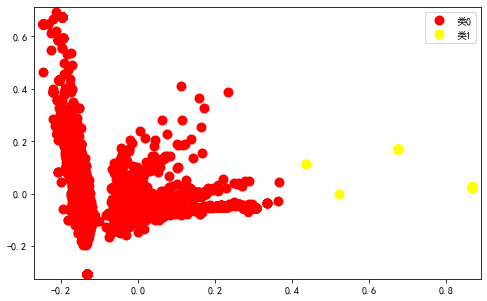

In [99]:
#每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重  
for i in range(len(weight)):
    for j in range(len(word)):
        result.write(str(weight[i][j]) + ' ')
    result.write('\r\n\r\n')
result.close()

print( 'Start Kmeans:')
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)   
s = clf.fit(weight)

#每个样本所属的簇
label = []               
i = 1
while i <= len(clf.labels_):
    label.append(clf.labels_[i-1])
    i = i + 1
        
y_pred = clf.labels_
    
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维
    
xs, ys = newData[:, 0], newData[:, 1]
#设置颜色
cluster_colors = {
    0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD', 7: '#98FB98'}
                  
#设置类名
cluster_names = {
    0: u'类0', 1: u'类1',2: u'类2',3: u'类3',4: u'类4',5: u'类5',6: u'类6',7: u'类7'} 
    
df = pd.DataFrame(dict(x=xs, y=ys, label=y_pred, title=corpus)) 
groups = df.groupby('label')
    
fig, ax = plt.subplots(figsize=(8, 5)) # set size
ax.margins(0.02)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name], color=cluster_colors[name], mec='none')
plt.legend()
plt.show()

In [89]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
list_word = []
list_count = []
for i in items[0:200]:
    word,count = i
    list_word.append(word)
    list_count.append(count)
    print("{0:<10}{1:>5}".format(word,count))
    

xinjiang  60960
china     26128
cotton    15779
chinese   11496
de         7965
people     6627
forced     6194
genocide   5684
western    5554
nike       5131
replying   5051
brands     4715
media      4378
rights     4146
human      4127
la         4119
labor      4088
sanctions  4064
uyghur     3852
chinas     3582
uyghurs    3198
boycott    3181
region     3141
en         3046
labour     2665
news       2630
support    2368
government 2303
foreign    2291
youtube.com 2229
companies  2198
propaganda 2121
beijing    2063
youtube    1869
camps      1866
countries  1851
backlash   1796
social     1795
uighur     1778
muslims    1756
lies       1755
officials  1732
statement  1671
nan        1618
abuses     1594
truth      1564
ccp        1546
global     1542
le         1539
adidas     1494
u.s        1458
panel      1429
united     1425
muslim     1407
reuters    1404
camp       1380
visit      1343
spokespersonchn 1322
el         1263
west       1261
issue      1258
uighurs    1255
uy

In [90]:
df5 = pd.DataFrame()
df5['word'] = list_word
df5['number'] = list_count
df5.to_csv('高频词.csv')

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
nG=nx.Graph();#创建一个空的图
nG

In [27]:
from tqdm import tqdm
def occurence(data,document): #定义共现矩阵
    empty1=[];empty2=[];empty3=[]
    for a,c in zip(data,document):
#         for b in data:
        empty1.append(a);empty2.append(a);empty3.append(c)#append() 方法向列表的尾部添加一个新的元素。只接受一个参数
    df=pd.DataFrame({
    'from':empty1,'to':empty2,'weight':empty3})
    #具有标注轴（行和列）的二维大小可变的表格数据结构
    G=nx.from_pandas_edgelist(df,'from','to','weight')
    #返回包含边列表的图形
    return (nx.to_pandas_adjacency(G,dtype=int))#注意对齐

In [28]:
# df1 = pd.DataFrame()
# df1['word'] = list_word
# df1['count'] = list_count
# G=nx.from_pandas_edgelist(df1)
d1 = occurence(list_word,list_count)
d1

,xinjiang,china,cotton,chinese,de,people,forced,genocide,western,nike,...,comments,bbcworld,you,false,british,dans,buy,violations,die,policies
xinjiang,60960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
china,0,26128,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cotton,0,0,15779,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,11496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
de,0,0,0,0,7965,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,518,0,0,0,0
buy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,516,0,0,0
violations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,515,0,0
die,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,515,0


D:\rgzn\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


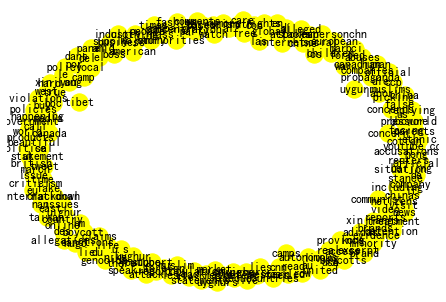

In [29]:
import networkx as nx
import matplotlib.pyplot as plt              #加入中文汉字
plt.rcParams['font.sans-serif']=['SimHei']   #设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus']=False     #设置正常显示字符
#设置线条样式  plt.rcParams['lines.linestyle'] = '-.'
#设置线条宽度 plt.rcParams['lines.linewidth'] = 3
nf1=nx.from_pandas_adjacency(d1)

nx.draw(nf1,with_labels=True,node_color='yellow')

In [30]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import ThemeType
w = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,width="600px",height="400px"))
    .add(series_name="新疆棉频次最高200个词", data_pair=items[0:200], word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="新疆棉频次最高200个词", title_textstyle_opts=opts.TextStyleOpts(font_size=32)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)
w.render_notebook()

In [68]:
w = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,width="600px",height="400px"))
    .add(series_name="新疆棉频次最高200个词", data_pair=items[0:200], word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="新疆棉频次最高200个词", title_textstyle_opts=opts.TextStyleOpts(font_size=32)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render('word.html')
)


In [31]:
data10 = data.loc[:,['likes','retweet','username','following','userlocation','content']]
data11 = data1.loc[:,['likes','retweet','username','following','postion','content']]
data12 = data2.loc[:,['likes','retweet','username','following','userlocation','content']]
data13 = data3.loc[:,['likes','retweet','username','following','userlocation','content']]
data14 = data4.loc[:,['likes','retweet','username','following','location','content']]

In [93]:
frames = [data10,data11,data12,data13,data14]
df10 = pd.concat(frames, axis=0 )
df11 = df10.loc[:,['likes','retweet','username','following','userlocation','content']]
df11.dropna(how='any',inplace=True)
df11.sort_values(by=['likes','retweet'], ascending=False, inplace=True)
df12 = df11.head(11)
df12 = df12.reset_index(drop=True) 
df12 = df12.drop(labels=[0])
df12.to_csv('影响力最大的10人.csv',encoding='utf-8')
df12

D:\rgzn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,likes,retweet,username,following,userlocation,content
1,96,61,DW Español,143,"Berlin, Germany",#China refutó las acusaciones de violaciones ...
2,96,46,The Epoch Times - China Insider,87,"New York, NY",#Turkey raised the issue of the treatment of #...
3,95,26,Adrian Zenz,174,"Minnesota, USA",The approach is very similar to that against t...
4,94,37,中国新疆网,2747,China,"#新疆 #Xinjiang #China Lee Camp, an American com..."
5,92,46,Benedict Rogers 羅傑斯,"7,647",London,A truly superb piece by the absolutely wonderf...
6,92,34,Dragon descendant ☭,"2,128",China,Please receive your weekly street fashion in X...
7,91,47,The New Yorker,381,"New York, NY","On #NewYorkerRadio, an internment camp survivo..."
8,9,9,T.S.,"7,813",Chicago,"Use our slaves or else, says China \n\nMultip..."
9,9,7,Kleptocracy Initiative,"2,198","Washington, DC",Hugo Boss tells Chinese customers it will cont...
10,9,4,Morning Edition,"3,411","Washington, DC","Clothing companies like H&M, Nike and Adidas a..."


In [33]:
data20 = data.loc[:,['retweet','posttime']]
data21 = data1.loc[:,['retweet','posttime']]
data22 = data2.loc[:,['retweet','posttime']]
data23 = data3.loc[:,['retweet','posttime']]
data24 = data4.loc[:,['retweet','posttime']]

In [34]:
import time,datetime
frames1 = [data20,data21,data22,data23,data24]
df25 = pd.concat(frames1, axis=0 )
df25.dropna(how='any',inplace=True)
def time_date(x):
    try:
        x = str(x)
        x = x.split(" ")
        x = x[0]
        x = x.replace("/","-")
        str_time = datetime.datetime.strptime(x, "%Y-%m-%d")
        return str_time
    except:
        pass

def type_float(x):
    import numbers
    a = isinstance(x, numbers.Number)
    if a == True:
        return int(x)
    else:
        return 0


df25['posttime'] =  df25['posttime'].apply(time_date)
df25['posttime'] = pd.to_datetime(df25['posttime'])
# df25.index = df25['posttime']
df25['retweet'] =  df25['retweet'].apply(type_float)
df25.dropna(how='any',inplace=True)

In [35]:
df26= df25.groupby(['posttime']).sum()
df26

,retweet
posttime,
2021-03-04,40
2021-03-05,90
2021-03-07,13
2021-03-08,32
2021-03-09,7
...,...
2021-05-26,61
2021-05-27,51
2021-05-28,8


D:\rgzn\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


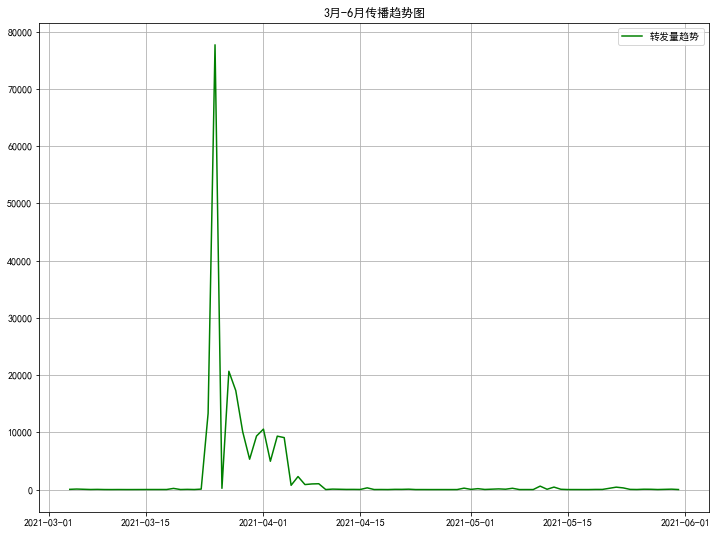

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(12, 9))
plt.plot(df26, label='转发量趋势', color='g')
plt.title('3月-6月传播趋势图')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
data1['userlocation'] =  data1['postion']
data4['userlocation'] =  data4['location']
data30 = data.loc[:,['username','userlocation']]
data31 = data1.loc[:,['username','userlocation']]
data32 = data2.loc[:,['username','userlocation']]
data33 = data3.loc[:,['username','userlocation']]
data34 = data4.loc[:,['username','userlocation']]
frames = [data30,data31,data32,data33,data34]
df15 = pd.concat(frames, axis=0 )
df15.dropna(how='any',inplace=True)
def tihuan(x):
    if type(x) == int or type(x) == float:
        return 'number'
    else:
        return x
df15.userlocation = df15.userlocation.apply(tihuan)
username = df15.username.tolist()
userlocation = df15.userlocation.tolist()

In [38]:
def tihuan(x):
    if type(x) == int or type(x) == float:
        return x
    else:
        return 0
df11['retweet'] = df11['retweet'].apply(tihuan)
df11['retweet'] = df11['retweet'].astype('int')
df14 = df11.drop(df11[df11['retweet'] < 5].index)
df14['userlocation'].value_counts()

Na                     507
Beijing, China         193
Beijing                104
Hong Kong               76
Washington, DC          66
                      ... 
Liverpool, England       1
Ottawa                   1
Chapel Hill, NC          1
Brazil                   1
Everywhere, Nowhere      1
Name: userlocation, Length: 632, dtype: int64

In [39]:
def guilei(x):
    x = str(x)
    x = x.split(',')
    x = x[0]
    if 'Beijing' in x or  'Hong Kong' in x or  '中国' in x or  '香' in x or  '北京' in x or  'china' in x or  'Shanghai' in x or  'Taipei' in x:
        return "China"
    elif 'New York' in x or  'Minnesota' in x or  'United States' in x or  'North Shields' in x or  'San Francisco' in x or  'Washington' in x:
        return "America"
    elif 'Team: SE Asia' in x or  'DMV area' in x or  '20 Rue Monsieur 75007 Paris' in x or  'St.20' in x or  '0' in x or  'Na' in x:
        return "Around the world"
    else:
        return x
df14['userlocation'] = df14['userlocation'].apply(guilei)
location = []
for i,j in df14['userlocation'].value_counts().items():
    if j <= 10:
        location.append(i)
location
for l in location:
    df14 = df14.drop(df14[df14['userlocation'] == l].index)
df14

D:\rgzn\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,likes,retweet,username,following,userlocation,content
1163,95,26,Adrian Zenz,174,America,The approach is very similar to that against t...
597,94,37,中国新疆网,2747,China,"#新疆 #Xinjiang #China Lee Camp, an American com..."
468,91,47,The New Yorker,381,America,"On #NewYorkerRadio, an internment camp survivo..."
107,8,5,Justice for Uyghurs - Switzerland,121,Around the world,Niece of Prominent Uyghur Scholar Confirmed to...
364,787,580,The New York Times,822,America,If women in Xinjiang had too many children or ...
...,...,...,...,...,...,...
7350,2,5,@mesapapern,Na,Around the world,ข้อได้เปรียบของ USA ในด้านสื่อเลยก็คือ คนทั่ว...
13759,2,5,@ugauthier,621,Paris,Liste de vedettes chinoises (nombreuses) qui o...
4989,1,69,@ravingsand,644,Around the world,หยิบๆ ดูอยู่วางแทบไม่ทัน xinjiang cotton เขียน...
31550,1,6,@shou30jin,164,Around the world,Listen to what a #Xinjiang cotton farmer said....


In [40]:
df14['userlocation'].value_counts()

China               670
Around the world    649
America             252
London               70
Pakistan             55
India                33
Paris                29
Brussels             26
Singapore            21
Berlin               16
Tokyo                13
Jakarta              11
大韩民国                 11
Name: userlocation, dtype: int64

In [41]:
def fenlei(x):
    if x == "China":
        return "A"
    if x == "Around the world":
        return "B"
    if x == "America":
        return "C"
    if x == "London":
        return "D"
    if x == "Pakistan":
        return "E"
    if x == "India":
        return "F"
    if x == "Paris":
        return "G"
    if x == "Brussels":
        return "J"
    if x == "Singapore":
        return "K"
    if x == "Berlin":
        return "L"
    if x == "Tokyo":
        return "M"
    if x == "大韩民国":
        return "N"
    if x == "Jakarta":
        return "O"
df14['label'] = df14['userlocation'].apply(fenlei)


In [42]:
df21 = df14[['username','retweet','label']].groupby(["username",'label']).agg('sum')
username1 = []
label1 = []
for i in df21.index:
    username1.append(i[0])
    label1.append(i[1])
df21['username1'] = username1
df21['label1'] = label1
df21

,,retweet,username1,label1
username,label,,,
@5h09un,B,18,@5h09un,B
@9107_ccccccc,B,8,@9107_ccccccc,B
@AAAHHH_CHU,B,95,@AAAHHH_CHU,B
@ABCWorldNews,C,18,@ABCWorldNews,C
@AC360,C,1098,@AC360,C
...,...,...,...,...
thecyrusjanssen,B,12,thecyrusjanssen,B
中国新疆网,A,212,中国新疆网,A
王嘉尔 Always Team Wang,D,5,王嘉尔 Always Team Wang,D


In [43]:
df23 = df21.reset_index(drop=True)
df23['id'] = df23.index
df23

,retweet,username1,label1,id
0,18,@5h09un,B,0
1,8,@9107_ccccccc,B,1
2,95,@AAAHHH_CHU,B,2
3,18,@ABCWorldNews,C,3
4,1098,@AC360,C,4
...,...,...,...,...
868,12,thecyrusjanssen,B,868
869,212,中国新疆网,A,869
870,5,王嘉尔 Always Team Wang,D,870
871,30,維布倫,A,871


In [44]:
df22 = df23[['username1','retweet','label1','id']].groupby(["label1"]).agg('max')
df22

,username1,retweet,id
label1,,,
A,香港大公文匯傳媒集團,7687,872
B,thecyrusjanssen,4666,868
C,santi ruiz,1098,866
D,王嘉尔 Always Team Wang,930,870
E,Zhang Heqing张和清,809,858
F,WION,223,851
G,jean-maurice.ripert,283,863
J,philippe de boeck,281,864
K,Sense Hofstede,92,815


In [45]:
def qushu(i):
    list_name = []
    list_retweet = []
    list_id = []
    for j,k,l,o in zip(df21.username1,df21.retweet,df21.label1,df23.index):
        if l == i:
            list_name.append(j)
            list_retweet.append(k)
            list_id.append(o)
    return list_name,list_retweet,list_id

In [46]:
categories = []
for d in df21.username1:
    cate_dict = {
        'name':d
    }
#     categories.append(cate_dict)
#     cate_dict = opts.GraphCategory(name=d)
    categories.append(cate_dict)


In [47]:
list_name1 = []
list_retweet1 = []
list_id1 = []
for l in df22.index.to_list():
    list_name,list_retweet,list_id = qushu(l)
    list_name1.append(list_name)
    list_retweet1.append(list_retweet)
    list_id1.append(list_id)


In [56]:
list_name2 = df22.username1.to_list()
list_retweet2 = df22.retweet.to_list()
list_label2 = df22.index.to_list()
list_id2 = df22.id.to_list()

links_list = []
for j in range(len(list_id2)):
    for k in list_id1[j]:
        links = {
            'source':list_id2[j],
            'target':k,
            
        }
#         links = opts.GraphLink(source=k, target=list_name2[j])

        links_list.append(links)

In [57]:
nodes_list = []
count = 0 
for j in range(len(list_label2)):
    for k in range(len(list_name1[j])):
        nodes = {
            "id": list_id1[j][k],
            'name':list_name1[j][k],
            "symbol_size":list_retweet1[j][k],
            "value":list_retweet1[j][k],
            "category":j+1
        }
        count += 1
        nodes_list.append(nodes)

In [67]:
from pyecharts import options as opts
from pyecharts.charts import Graph
from pyecharts.globals import ThemeType
c = (
    Graph()
    .add(
        "",
        nodes_list,
        links_list,
        categories,
        repulsion=50,
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Graph-新疆棉意见领袖图"),
    )
#     .render("graph_weibo.html")
)
c.render_notebook()

In [69]:
c = (
    Graph()
    .add(
        "",
        nodes_list,
        links_list,
        categories,
        repulsion=50,
        linestyle_opts=opts.LineStyleOpts(curve=0.2),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        legend_opts=opts.LegendOpts(is_show=False),
        title_opts=opts.TitleOpts(title="Graph-新疆棉意见领袖图"),
    )
    .render("graph.html")
)
